<img src="https://static.wixstatic.com/media/34bab5_0ed7f360090844dfa3a8a72132d8007f~mv2.png/v1/fill/w_1000,h_405,al_c,q_90,usm_0.66_1.00_0.01/34bab5_0ed7f360090844dfa3a8a72132d8007f~mv2.png">

## Introduction
The Haberman Survival dataset, named after researcher R.A. Haberman, encompasses medical records of breast cancer surgery patients at the University of Chicago's Billings Hospital from 1958 to 1970. Comprising 306 instances, it includes patient age, year of operation, and the number of positive axillary nodes. The dataset is a prominent resource for survival analysis, particularly in predicting whether patients survive for a minimum of 5 years post-surgery. Widely utilized in machine learning, it serves as a fundamental benchmark for developing and evaluating algorithms, making significant contributions to the field of medical research and statistical analysis.

In [1]:
# Haverman dataset

# **1 import Necessary Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# **2 import Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/haberman/haberman.csv")

# **3 Data Analysis**

In [4]:
df.head()

,Age,Year,Nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
df.tail()

,Age,Year,Nodes,Status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [6]:
df.shape

(305, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     305 non-null    int64
 1   Year    305 non-null    int64
 2   Nodes   305 non-null    int64
 3   Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
df.dtypes

Age       int64
Year      int64
Nodes     int64
Status    int64
dtype: object

In [9]:
df.describe()

,Age,Year,Nodes,Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
df.corr()

,Age,Year,Nodes,Status
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Nodes,-0.066548,-0.003277,1.000000,0.286191
Status,0.064351,-0.004076,0.286191,1.000000


In [11]:
df.ndim

2

In [12]:
df.columns

Index(['Age', 'Year', 'Nodes', 'Status'], dtype='object')

In [13]:
df["Status"].value_counts()

Status
1    224
2     81
Name: count, dtype: int64

# **4 Data cleaning and Preprocessing:**

In [14]:
df.isnull().sum()

Age       0
Year      0
Nodes     0
Status    0
dtype: int64

In [15]:
df['Status'].value_counts()

Status
1    224
2     81
Name: count, dtype: int64

<a id="4"></a>

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">5| Data visualisation 📊 📉
    
</div>

## EDA (Exploratory Data Analysis)


## 5.1 displot

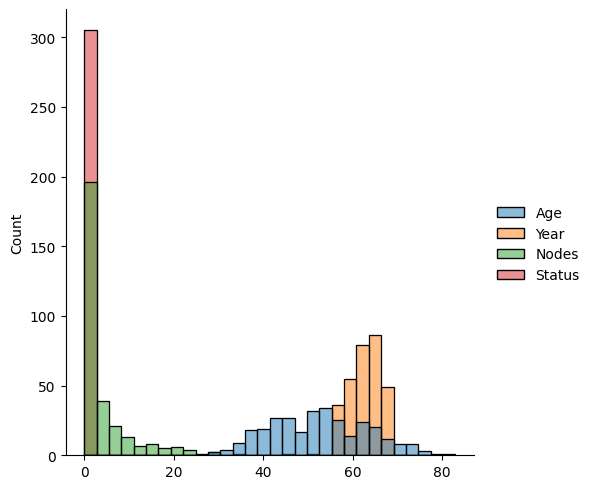

In [16]:
sns.displot(df, kde=False, bins=30)
plt.show()

## 5.2 Scatter Plot

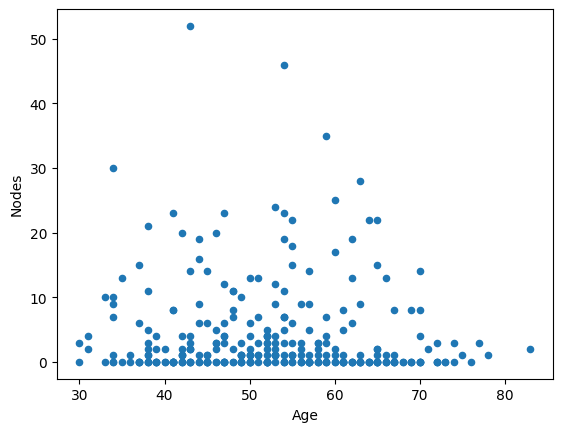

In [17]:
df.plot(kind='scatter', x='Age', y='Nodes')
plt.show()

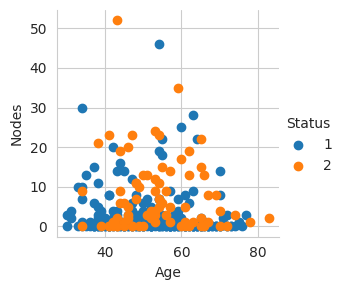

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Status").map(plt.scatter, "Age", "Nodes").add_legend();
plt.show();

## 5.3 boxplot

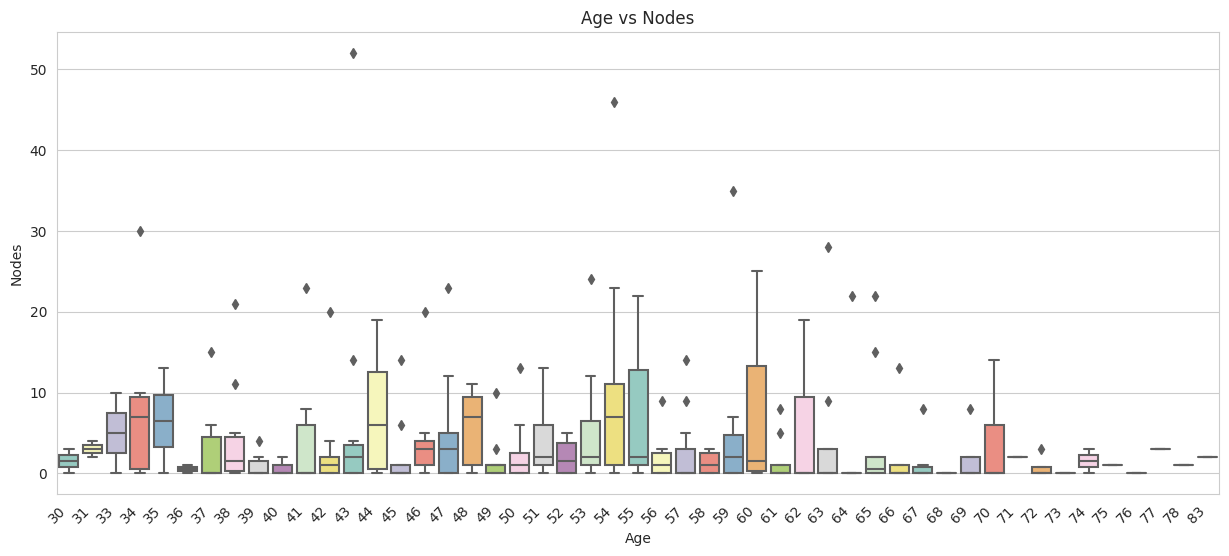

In [19]:
# sepal_length vs sepal_width boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='Nodes', data=df, palette='Set3')
plt.title('Age vs Nodes')
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.xticks(rotation=45, ha='right')
plt.show()

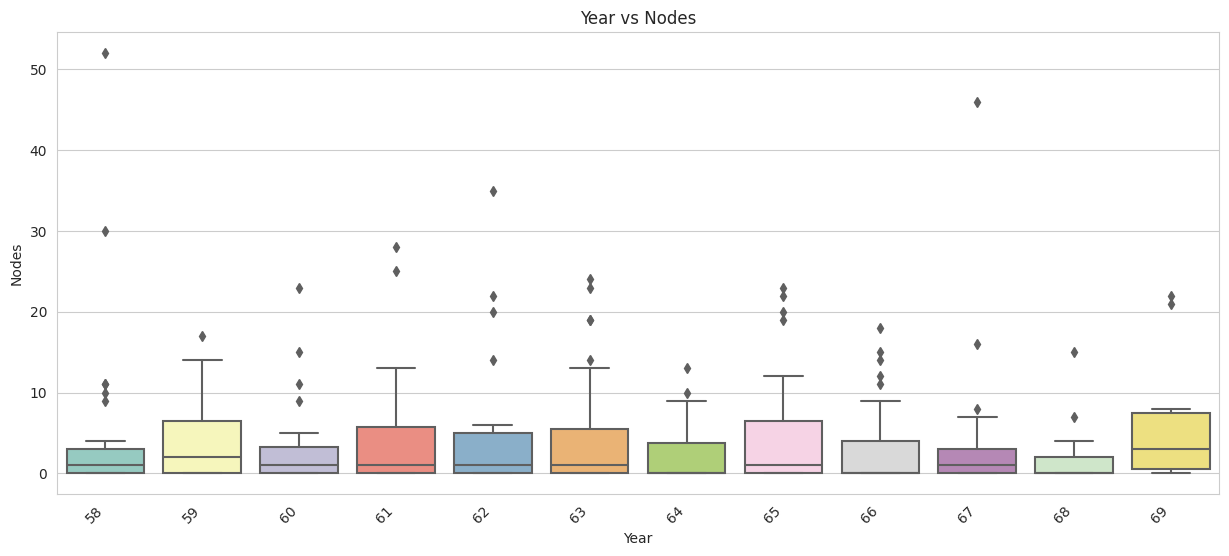

In [20]:
# sepal_length vs sepal_width boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(x='Year', y='Nodes', data=df, palette='Set3')
plt.title('Year vs Nodes')
plt.xlabel('Year')
plt.ylabel('Nodes')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5.4 countplot

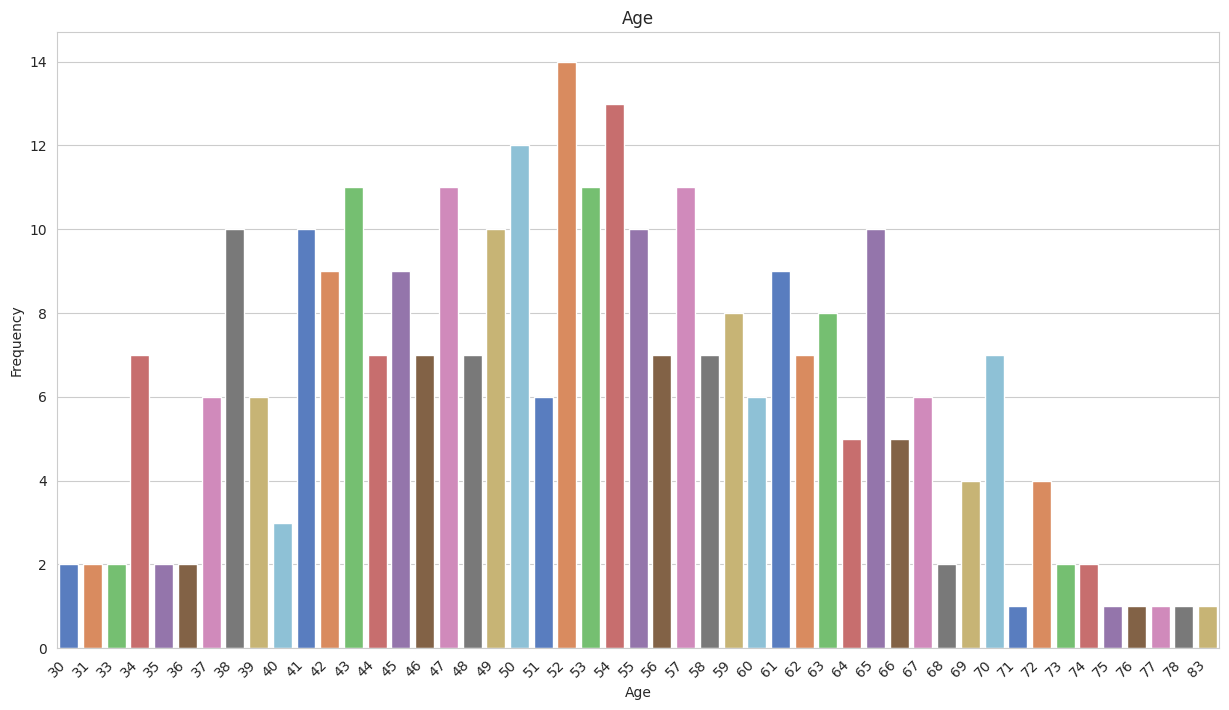

In [21]:
# sepal_length
plt.figure(figsize=(15, 8))
sns.countplot(x='Age', data=df, palette='muted')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

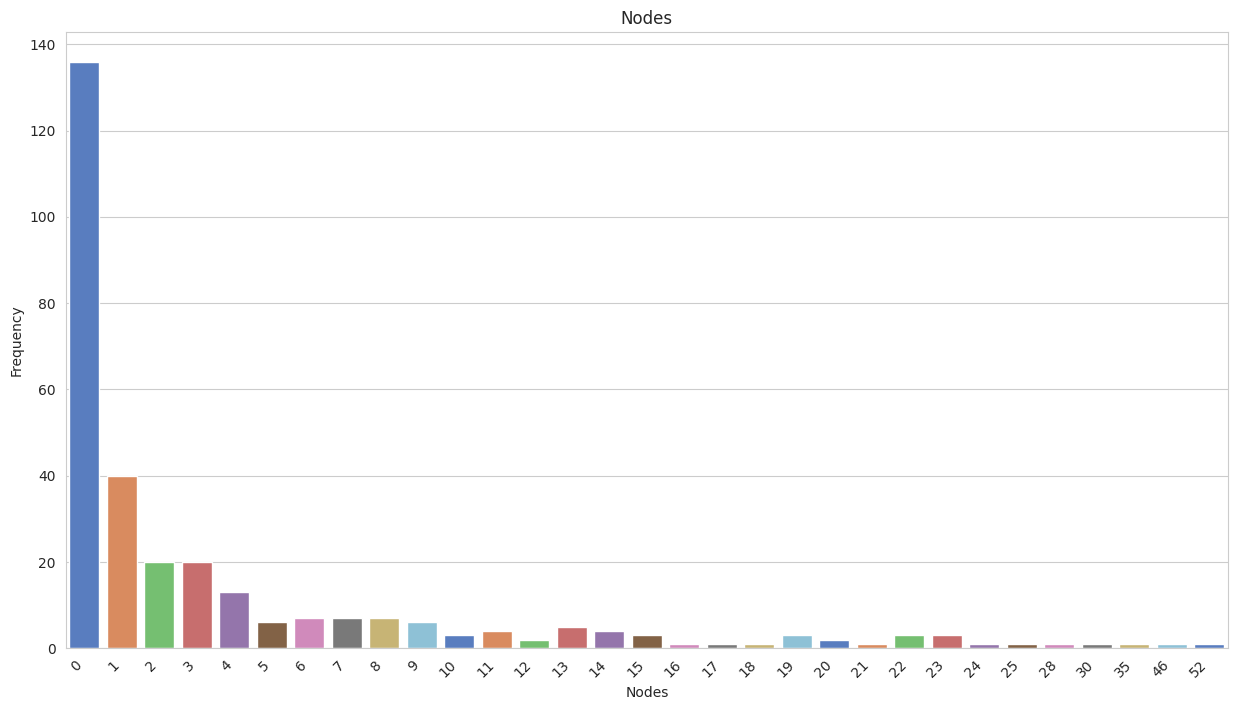

In [22]:
# sepal_length
plt.figure(figsize=(15, 8))
sns.countplot(x='Nodes', data=df, palette='muted')
plt.title('Nodes')
plt.xlabel('Nodes')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5.5 pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


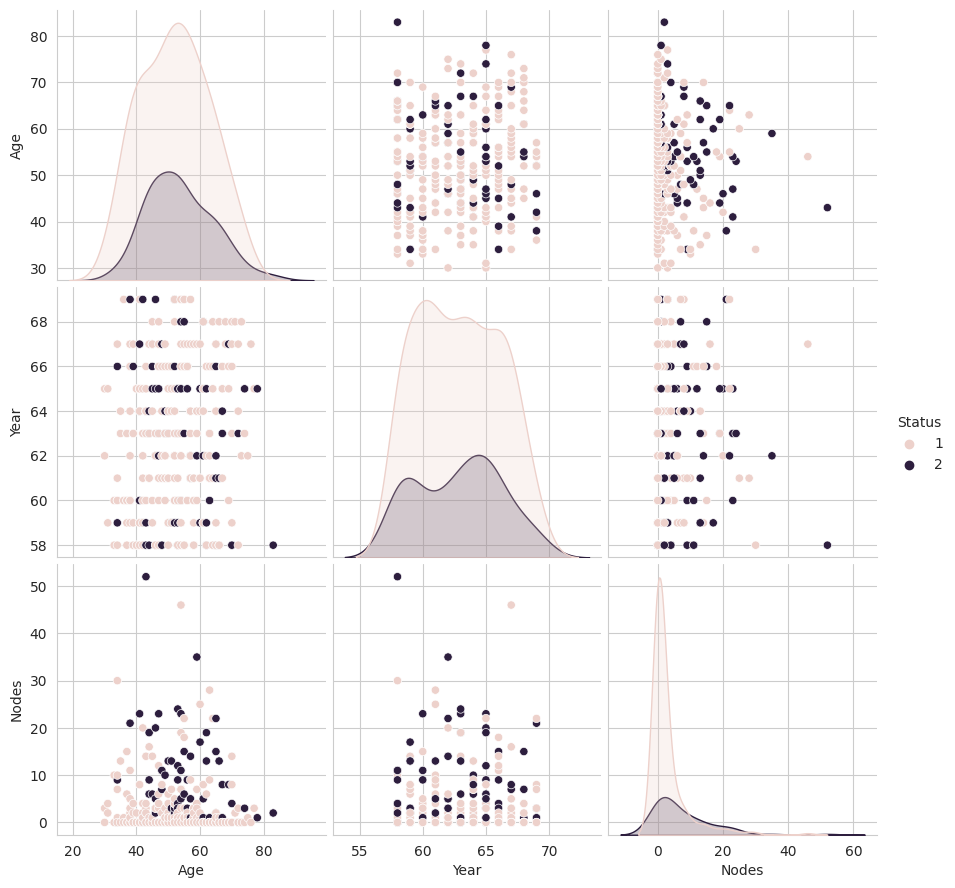

In [23]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Status", size=3)
plt.show()

## 5.6 Hist Plot

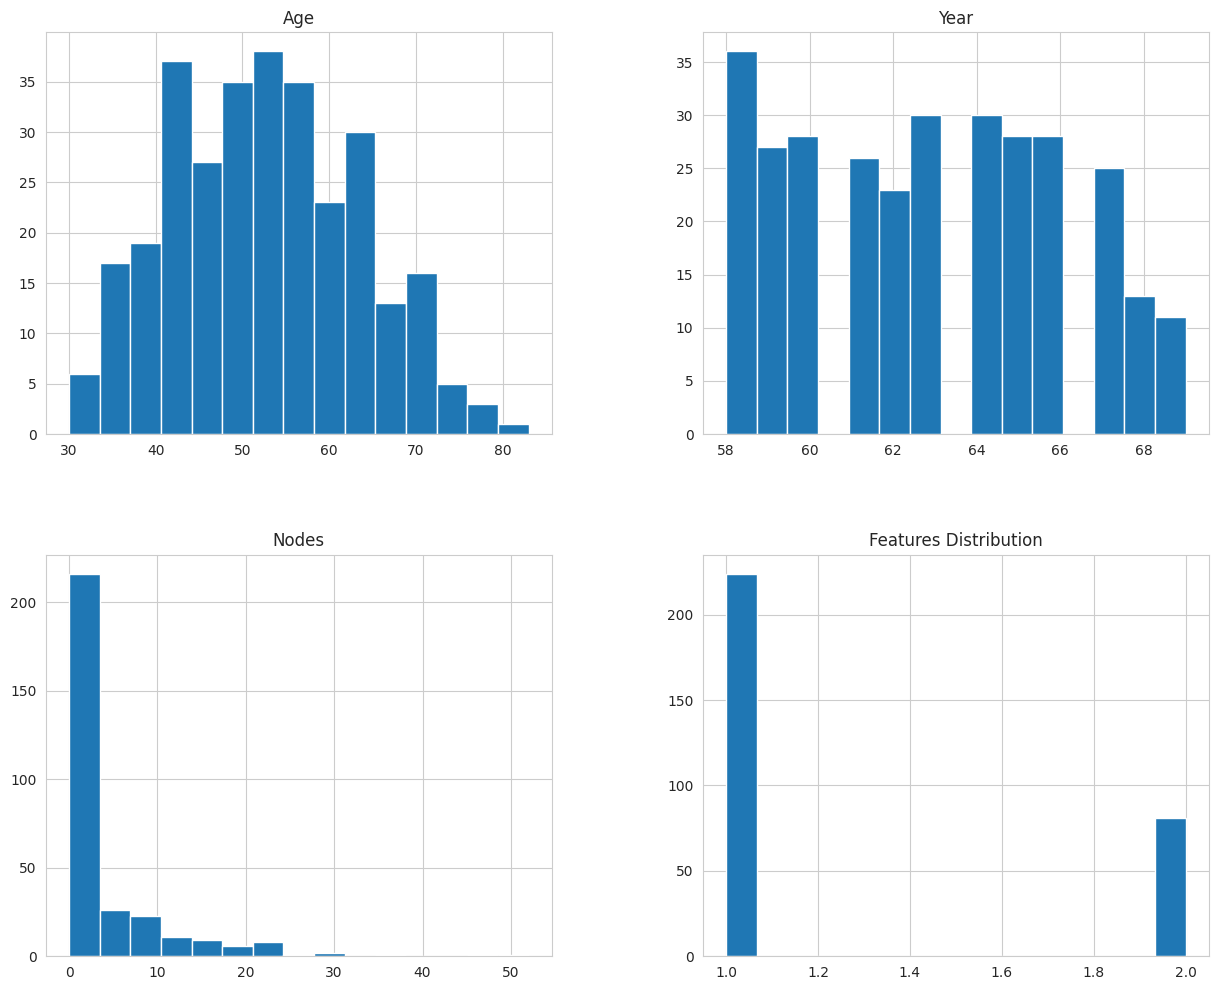

In [24]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

## 5.7 violinplot

<Axes: xlabel='Status', ylabel='Age'>

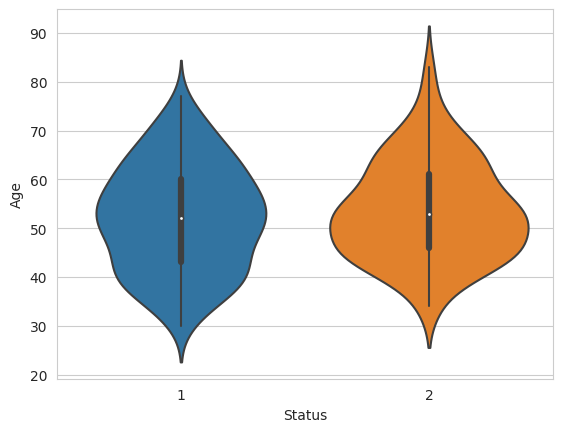

In [25]:
sns.violinplot(x="Status",y="Age", data=df, size = 8)

<Axes: xlabel='Status', ylabel='Year'>

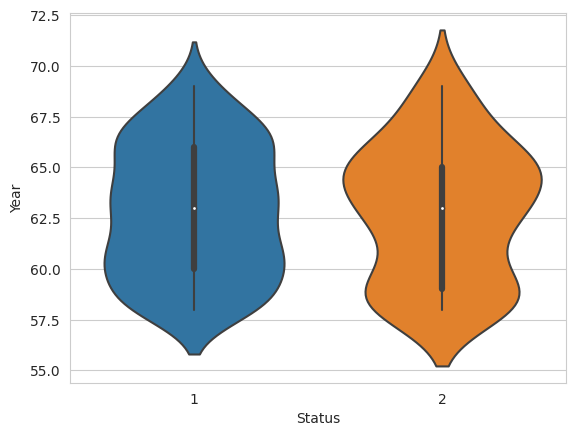

In [26]:
sns.violinplot(x="Status",y="Year", data=df, size = 8)

<Axes: xlabel='Status', ylabel='Nodes'>

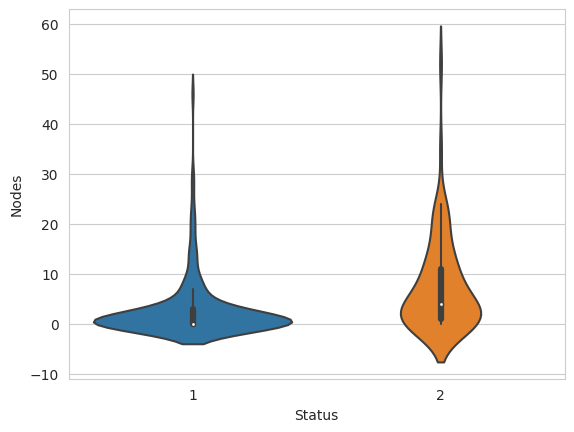

In [27]:
sns.violinplot(x="Status",y="Nodes", data=df, size = 8)

## 5.8 Pie Plot

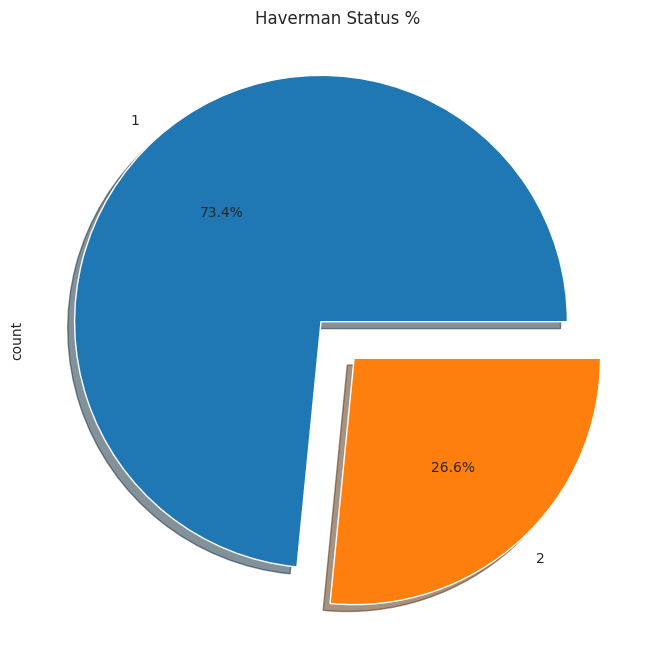

In [28]:
ax=plt.subplots(1,1,figsize=(10,8))
df['Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Haverman Status %")
plt.show()

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">6 | Split the Dataset

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df[["Age", "Year", "Nodes"]]

In [31]:
y = df['Status']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((244, 3), (61, 3), (244,), (61,))

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">7 | PCA (Principal Component Analysis) </div>

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
pca

PCA(n_components=2)

In [37]:
X_pca = pca.fit_transform(X)

In [38]:
X_pca[0]

array([-22.39138751,  -2.83734654])

In [39]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.65192362 0.28910141]


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ft = scaler.fit_transform(X)

In [41]:
X_ft[0]

array([0.        , 0.36363636, 0.05769231])

In [42]:
X_ft[1]

array([0.        , 0.63636364, 0.        ])

<div style='background-color: #ffe7f6; border: 2px solid; padding :5px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="#FF0094" ><b>⚙ Machine Learning Algorithm</b></font>
</div>

# Algorithm 🔄

## (1) KNN 🔄

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [45]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
train_predictions = knn_classifier.predict(X_train)

train_accuracy1 = accuracy_score(y_train, train_predictions)

In [47]:
test_predictions = knn_classifier.predict(X_test)

test_accuracy1 = accuracy_score(y_test, test_predictions)

In [48]:
print(f"Training Accuracy: {train_accuracy1}")
print(f"Testing Accuracy: {test_accuracy1}")

Training Accuracy: 0.8647540983606558
Testing Accuracy: 0.6885245901639344


## (2) Naive Bayes classifier

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

In [50]:
# GaussianNB

In [51]:
G_classifier = GaussianNB()

In [52]:
G_classifier.fit(X_train, y_train)

GaussianNB()

In [53]:
train_predictions = G_classifier.predict(X_train)

train_accuracy21 = accuracy_score(y_train, train_predictions)

In [54]:
test_predictions = G_classifier.predict(X_test)

test_accuracy21 = accuracy_score(y_test, test_predictions)

In [55]:
print(f"Training Accuracy: {train_accuracy21}")
print(f"Testing Accuracy: {test_accuracy21}")

Training Accuracy: 0.75
Testing Accuracy: 0.7704918032786885


In [56]:
B_classifier = BernoulliNB()

In [57]:
B_classifier.fit(X_train, y_train)

BernoulliNB()

In [58]:
train_predictions = B_classifier.predict(X_train)

train_accuracy22 = accuracy_score(y_train, train_predictions)

In [59]:
test_predictions = G_classifier.predict(X_test)

test_accuracy22 = accuracy_score(y_test, test_predictions)

In [60]:
print(f"Training Accuracy: {train_accuracy22}")
print(f"Testing Accuracy: {test_accuracy22}")

Training Accuracy: 0.7254098360655737
Testing Accuracy: 0.7704918032786885


In [61]:
# MultinomialNB

In [62]:
M_classifier = MultinomialNB()

In [63]:
M_classifier.fit(X_train, y_train)

MultinomialNB()

In [64]:
train_predictions = M_classifier.predict(X_train)

train_accuracy23 = accuracy_score(y_train, train_predictions)

In [65]:
test_predictions = M_classifier.predict(X_test)

test_accuracy23 = accuracy_score(y_test, test_predictions)

In [66]:
print(f"Training Accuracy: {train_accuracy23}")
print(f"Testing Accuracy: {test_accuracy23}")

Training Accuracy: 0.7336065573770492
Testing Accuracy: 0.7377049180327869


## 👉 GaussianNB
### Training Accuracy: 0.75
### Testing Accuracy: 0.7704918032786885
## 👉 BernoulliNB
### Training Accuracy: 0.7254098360655737
### Testing Accuracy: 0.7704918032786885
## 👉 MultinomialNB
### Training Accuracy: 0.7336065573770492
### Testing Accuracy: 0.7377049180327869
## Being the best of them | 🔥 GaussianNB |

# (3) Decision Tree 🔄

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf = DecisionTreeClassifier()

In [69]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
train_predictions = clf.predict(X_train)

train_accuracy3 = accuracy_score(y_train, train_predictions)

In [71]:
test_predictions = clf.predict(X_test)

test_accuracy3 = accuracy_score(y_test, test_predictions)

In [72]:
print(f"Training Accuracy: {train_accuracy3}")
print(f"Testing Accuracy: {test_accuracy3}")

Training Accuracy: 0.9754098360655737
Testing Accuracy: 0.7540983606557377


# (4) Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [75]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
train_predictions = rf_classifier.predict(X_train)

train_accuracy4 = accuracy_score(y_train, train_predictions)

In [77]:
test_predictions = rf_classifier.predict(X_test)

test_accuracy4 = accuracy_score(y_test, test_predictions)

In [78]:
print(f"Training Accuracy: {train_accuracy4}")
print(f"Testing Accuracy: {test_accuracy4}")

Training Accuracy: 0.9754098360655737
Testing Accuracy: 0.7868852459016393


# (5) Boosting Algorithm

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
base_classifier = DecisionTreeClassifier(max_depth=1)

In [81]:
adaboost_classifie = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

In [82]:
adaboost_classifie.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [83]:
train_predictions = adaboost_classifier.predict(X_train)

train_accuracy5 = accuracy_score(y_train, train_predictions)

NameError: name 'adaboost_classifier' is not defined

In [ ]:
test_predictions = adaboost_classifier.predict(X_test)

test_accuracy5 = accuracy_score(y_test, test_predictions)

In [ ]:
print(f"Training Accuracy: {train_accuracy5}")
print(f"Testing Accuracy: {test_accuracy5}")

# **(6).SVM**

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [87]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
train_predictions = svm_classifier.predict(X_train)

train_accuracy6 = accuracy_score(y_train, train_predictions)

In [89]:
test_predictions = svm_classifier.predict(X_test)

test_accuracy6 = accuracy_score(y_test, test_predictions)

In [90]:
print(f"Training Accuracy: {train_accuracy6}")
print(f"Testing Accuracy: {test_accuracy6}")

Training Accuracy: 0.7213114754098361
Testing Accuracy: 0.7704918032786885


# **(7). Logistic Regression**

In [91]:
from sklearn import linear_model

In [92]:
lrg = linear_model.LogisticRegression()

In [93]:
lrg.fit(X_train, y_train)

LogisticRegression()

In [94]:
train_predictions = lrg.predict(X_train)

train_accuracy7 = accuracy_score(y_train, train_predictions)

In [95]:
test_predictions = lrg.predict(X_test)

test_accuracy7 = accuracy_score(y_test, test_predictions)

In [96]:
print(f"Training Accuracy: {train_accuracy7}")
print(f"Testing Accuracy: {test_accuracy7}")

Training Accuracy: 0.7377049180327869
Testing Accuracy: 0.7704918032786885


# **(8).Linear Regression**

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [98]:
model = LinearRegression()

In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [100]:
train_predictions = clf.predict(X_train)

train_accuracy8 = accuracy_score(y_train, train_predictions)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [101]:
test_predictions = clf.predict(X_test)

test_accuracy8 = accuracy_score(y_test, test_predictions)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [102]:
print(f"Training Accuracy: {train_accuracy8}")
print(f"Testing Accuracy: {test_accuracy8}")

Training Accuracy: 0.7254098360655737
Testing Accuracy: 0.7704918032786885


# **(9).Gradient Boosting Machines (GBM)**

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [105]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [106]:
train_predictions = model.predict(X_train)

train_accuracy9 = accuracy_score(y_train, train_predictions)

In [107]:
test_predictions = model.predict(X_test)

test_accuracy9 = accuracy_score(y_test, test_predictions)

In [108]:
print(f"Training Accuracy: {train_accuracy9}")
print(f"Testing Accuracy: {test_accuracy9}")

Training Accuracy: 0.889344262295082
Testing Accuracy: 0.7704918032786885


# **Random Forest, Decision Tree, Gradient Boosting Machines (GBM), Algorithm is the best accuracy**
# (GradientBoostingClassifier)

### accuracy min = 8.5

# <img src="https://www.shutterstock.com/image-vector/85-percents-pie-chart-infographic-260nw-1887738802.jpg">

# <img src="https://thumbs.dreamstime.com/t/bright-colorful-thank-you-banner-vector-overlapping-letters-118244535.jpg">

## **<div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">10 | Hierarchical Clustering </div>**

In [109]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
linkage_matrix = linkage(X_scaled, method='ward')

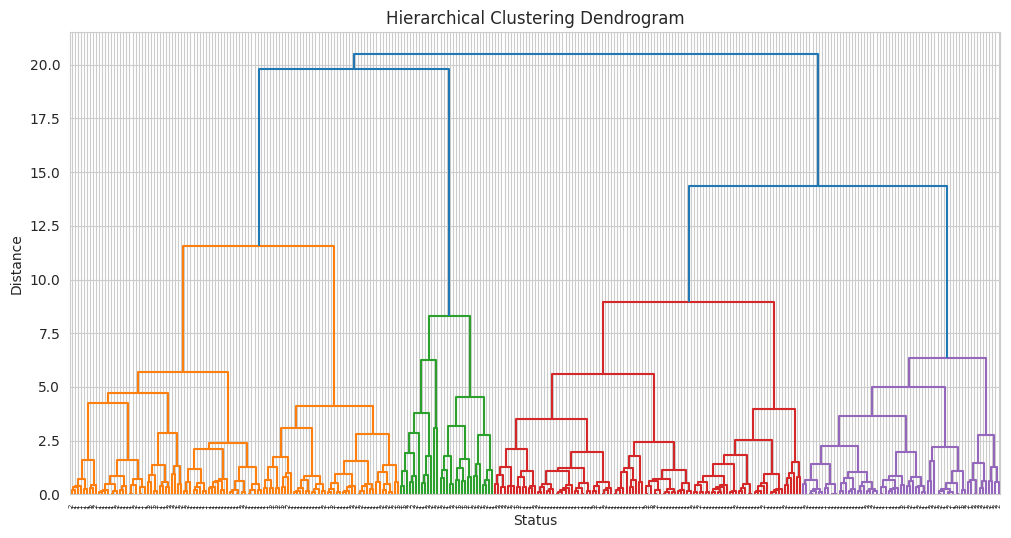

In [114]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df['Status'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Status')
plt.ylabel('Distance')
plt.show()